1. Loading the data

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('Q1_material_diabetic_data_final.csv')

# Show basic info
print(df.shape)
df.head()


(101766, 48)


<ipython-input-58-9a4cbe60c93f>:4: DtypeWarning: Columns (6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Q1_material_diabetic_data_final.csv')


,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Understand the Data Types and Missing Values

In [ ]:
# Data types and missing values
df.info()
##Drop - Unnamed, Payers_code, medical_speciality, max_glu_serum, A1Cresult, encounter_id, patient_number
df = df.drop(df.columns[[0,1,2, 11, 12, 20 ,21]], axis=1)
df.info()

# Count missing or 'Unknown/Invalid' values
df.replace('?', pd.NA, inplace=True)
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Unnamed: 0                101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      99493 non-null   object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    81413 non-null   object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                61510 non-null   object
 12  medical_specialty         51817 non-null   object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

,0
race,2273
weight,20353


In [ ]:
##before modification - print(df.shape)
df["race"].isna().sum()
##Drop those rows which have NA values in "race" column
df = df.dropna(subset=["race"])
print(df.shape)

(99493, 41)


In [ ]:
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
print(df.shape)

(99493, 42)


<ipython-input-61-e38c36c20345>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)


In [ ]:
#Extract the values of the transformed readmitted col
df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,Caucasian,Female,[0-10),NaN,6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,[10-20),NaN,1,1,7,3,59,0,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,11,5,...,No,No,No,No,No,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),NaN,1,1,7,2,44,1,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),NaN,1,1,7,1,51,0,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),[75-100),1,3,7,3,51,0,...,Down,No,No,No,No,No,Ch,Yes,>30,0
101762,AfricanAmerican,Female,[80-90),[75-100),1,4,5,5,33,3,...,Steady,No,No,No,No,No,No,Yes,NO,0
101763,Caucasian,Male,[70-80),[100-125),1,1,7,1,53,0,...,Down,No,No,No,No,No,Ch,Yes,NO,0
101764,Caucasian,Female,[80-90),[50-75),2,3,7,10,45,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0


In [ ]:
df.dtypes

,0
race,object
gender,object
age,object
weight,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64
num_lab_procedures,int64
num_procedures,int64


In [ ]:
import numpy as np

# Standardize missing values by replacing known text-based NA values with actual NaN
na_values = ['NA', 'Missing', 'unknown', 'n/a', 'none', 'null', '-']  # Add more if needed
df['weight'] = df['weight'].replace(na_values, np.nan)

# Function to convert interval string to its median value
def interval_median(interval):
    if pd.isna(interval):  # If NaN, return NaN
        return np.nan
    try:
        lower, upper = map(float, interval.split('-'))  # Split interval into numbers
        return (lower + upper) / 2  # Compute median
    except:
        return np.nan  # Handle unexpected values

# Convert interval strings to numeric medians
df['weight_median'] = df['weight'].apply(interval_median)

# Compute overall median (excluding NaNs)
overall_median = df['weight_median'].median()

# Check if overall_median is NaN and replace with a default value if necessary
if np.isnan(overall_median):
    overall_median = 75  # Or any other reasonable default value

# Replace NaN values in 'weight' with the overall median interval
df['weight'] = df['weight'].fillna(f"[{int(overall_median - 2.5)}-{int(overall_median + 2.5)})")

print(df)

<ipython-input-64-fe3913f1bbf6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'] = df['weight'].replace(na_values, np.nan)


                   race  gender      age     weight  admission_type_id  \
0             Caucasian  Female   [0-10)    [72-77)                  6   
1             Caucasian  Female  [10-20)    [72-77)                  1   
2       AfricanAmerican  Female  [20-30)    [72-77)                  1   
3             Caucasian    Male  [30-40)    [72-77)                  1   
4             Caucasian    Male  [40-50)    [72-77)                  1   
...                 ...     ...      ...        ...                ...   
101761  AfricanAmerican    Male  [70-80)   [75-100)                  1   
101762  AfricanAmerican  Female  [80-90)   [75-100)                  1   
101763        Caucasian    Male  [70-80)  [100-125)                  1   
101764        Caucasian  Female  [80-90)    [50-75)                  2   
101765        Caucasian    Male  [70-80)    [50-75)                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
0                             25    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99493 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      99493 non-null  object 
 1   gender                    99493 non-null  object 
 2   age                       99493 non-null  object 
 3   weight                    99493 non-null  object 
 4   admission_type_id         99493 non-null  int64  
 5   discharge_disposition_id  99493 non-null  int64  
 6   admission_source_id       99493 non-null  int64  
 7   time_in_hospital          99493 non-null  int64  
 8   num_lab_procedures        99493 non-null  int64  
 9   num_procedures            99493 non-null  int64  
 10  num_medications           99493 non-null  int64  
 11  number_outpatient         99493 non-null  int64  
 12  number_emergency          99493 non-null  int64  
 13  number_inpatient          99493 non-null  int64  
 14  number_dia

In [ ]:
# Select columns from index 15 to 37
medication_cols = df.columns[15:38]  # 38 because Python slicing excludes the last index

# Define mapping
med_mapping = {'No': 0, 'Steady': 1, 'Up': 2, 'Down': -1}
change_mapping = {'Ch': 1, 'No': 0}
yes_no_mapping = {'Yes': 1, 'No': 0}

# Apply transformation
for col in medication_cols:
    df[col] = df[col].astype(str).str.strip().map(med_mapping)

# Ensure integer type
df[medication_cols] = df[medication_cols].astype(int)
# Convert column 38 (first occurrence) → 'Change' to 1, 'No Change' to 0
df[df.columns[38]] = df[df.columns[38]].astype(str).str.strip().map(change_mapping)

# Convert column 39 → 'Yes' to 1, 'No' to 0
df[df.columns[39]] = df[df.columns[39]].astype(str).str.strip().map(yes_no_mapping)


df


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,readmitted_binary,weight_median
0,Caucasian,Female,[0-10),[72-77),6,25,1,1,41,0,...,0,0,0,0,0,0,0,NO,0,NaN
1,Caucasian,Female,[10-20),[72-77),1,1,7,3,59,0,...,0,0,0,0,0,1,1,>30,0,NaN
2,AfricanAmerican,Female,[20-30),[72-77),1,1,7,2,11,5,...,0,0,0,0,0,0,1,NO,0,NaN
3,Caucasian,Male,[30-40),[72-77),1,1,7,2,44,1,...,0,0,0,0,0,1,1,NO,0,NaN
4,Caucasian,Male,[40-50),[72-77),1,1,7,1,51,0,...,0,0,0,0,0,1,1,NO,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),[75-100),1,3,7,3,51,0,...,0,0,0,0,0,1,1,>30,0,NaN
101762,AfricanAmerican,Female,[80-90),[75-100),1,4,5,5,33,3,...,0,0,0,0,0,0,1,NO,0,NaN
101763,Caucasian,Male,[70-80),[100-125),1,1,7,1,53,0,...,0,0,0,0,0,1,1,NO,0,NaN
101764,Caucasian,Female,[80-90),[50-75),2,3,7,10,45,2,...,0,0,0,0,0,1,1,NO,0,NaN


In [ ]:
df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,readmitted_binary,weight_median
0,Caucasian,Female,[0-10),[72-77),6,25,1,1,41,0,...,0,0,0,0,0,0,0,NO,0,NaN
1,Caucasian,Female,[10-20),[72-77),1,1,7,3,59,0,...,0,0,0,0,0,1,1,>30,0,NaN
2,AfricanAmerican,Female,[20-30),[72-77),1,1,7,2,11,5,...,0,0,0,0,0,0,1,NO,0,NaN
3,Caucasian,Male,[30-40),[72-77),1,1,7,2,44,1,...,0,0,0,0,0,1,1,NO,0,NaN
4,Caucasian,Male,[40-50),[72-77),1,1,7,1,51,0,...,0,0,0,0,0,1,1,NO,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),[75-100),1,3,7,3,51,0,...,0,0,0,0,0,1,1,>30,0,NaN
101762,AfricanAmerican,Female,[80-90),[75-100),1,4,5,5,33,3,...,0,0,0,0,0,0,1,NO,0,NaN
101763,Caucasian,Male,[70-80),[100-125),1,1,7,1,53,0,...,0,0,0,0,0,1,1,NO,0,NaN
101764,Caucasian,Female,[80-90),[50-75),2,3,7,10,45,2,...,0,0,0,0,0,1,1,NO,0,NaN


In [ ]:
# Extract numeric bounds from weight range
df[['lower', 'upper']] = df['weight'].str.extract(r'(\d+)-(\d+)').astype(float)

# Calculate midpoint
df['weight_midpoint'] = (df['lower'] + df['upper']) / 2

# Drop temporary columns
df.drop(columns=['lower', 'upper'], inplace=True)

# Display result
print(df[['weight', 'weight_midpoint']])


           weight  weight_midpoint
0         [72-77)             74.5
1         [72-77)             74.5
2         [72-77)             74.5
3         [72-77)             74.5
4         [72-77)             74.5
...           ...              ...
101761   [75-100)             87.5
101762   [75-100)             87.5
101763  [100-125)            112.5
101764    [50-75)             62.5
101765    [50-75)             62.5

[99493 rows x 2 columns]


In [ ]:
df.drop(columns=['weight_median'], inplace=True)

In [ ]:
df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,readmitted_binary,weight_midpoint
0,Caucasian,Female,[0-10),[72-77),6,25,1,1,41,0,...,0,0,0,0,0,0,0,NO,0,74.5
1,Caucasian,Female,[10-20),[72-77),1,1,7,3,59,0,...,0,0,0,0,0,1,1,>30,0,74.5
2,AfricanAmerican,Female,[20-30),[72-77),1,1,7,2,11,5,...,0,0,0,0,0,0,1,NO,0,74.5
3,Caucasian,Male,[30-40),[72-77),1,1,7,2,44,1,...,0,0,0,0,0,1,1,NO,0,74.5
4,Caucasian,Male,[40-50),[72-77),1,1,7,1,51,0,...,0,0,0,0,0,1,1,NO,0,74.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),[75-100),1,3,7,3,51,0,...,0,0,0,0,0,1,1,>30,0,87.5
101762,AfricanAmerican,Female,[80-90),[75-100),1,4,5,5,33,3,...,0,0,0,0,0,0,1,NO,0,87.5
101763,Caucasian,Male,[70-80),[100-125),1,1,7,1,53,0,...,0,0,0,0,0,1,1,NO,0,112.5
101764,Caucasian,Female,[80-90),[50-75),2,3,7,10,45,2,...,0,0,0,0,0,1,1,NO,0,62.5


In [ ]:
##For columns race, gender
# Define mappings
race_mapping = {
    'Caucasian': 0,
    'AfricanAmerican': 1,
    'Other': 2,
    'Asian': 3,
    'Hispanic': 4
}

gender_mapping = {
    'Female': 0,
    'Male': 1,
    'Unknown/Invalid': -1  # Assign -1 for unknown values
}

# Clean text data: Remove spaces & ensure correct format
# Convert 'race' column, handling NaN values
df[df.columns[0]] = df[df.columns[0]].astype(str).str.strip().map(race_mapping)
# Fill NaN values with a placeholder (e.g., -2) before converting to int
df[df.columns[0]] = df[df.columns[0]].fillna(-2).astype(int)

# Convert 'gender' column, handling NaN values
df[df.columns[1]] = df[df.columns[1]].astype(str).str.strip().map(gender_mapping)
# Fill NaN values with a placeholder (e.g., -2) before converting to int
df[df.columns[1]] = df[df.columns[1]].fillna(-2).astype(int)

df


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,readmitted_binary,weight_midpoint
0,0,0,[0-10),[72-77),6,25,1,1,41,0,...,0,0,0,0,0,0,0,NO,0,74.5
1,0,0,[10-20),[72-77),1,1,7,3,59,0,...,0,0,0,0,0,1,1,>30,0,74.5
2,1,0,[20-30),[72-77),1,1,7,2,11,5,...,0,0,0,0,0,0,1,NO,0,74.5
3,0,1,[30-40),[72-77),1,1,7,2,44,1,...,0,0,0,0,0,1,1,NO,0,74.5
4,0,1,[40-50),[72-77),1,1,7,1,51,0,...,0,0,0,0,0,1,1,NO,0,74.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,1,[70-80),[75-100),1,3,7,3,51,0,...,0,0,0,0,0,1,1,>30,0,87.5
101762,1,0,[80-90),[75-100),1,4,5,5,33,3,...,0,0,0,0,0,0,1,NO,0,87.5
101763,0,1,[70-80),[100-125),1,1,7,1,53,0,...,0,0,0,0,0,1,1,NO,0,112.5
101764,0,0,[80-90),[50-75),2,3,7,10,45,2,...,0,0,0,0,0,1,1,NO,0,62.5


In [ ]:
###For Age column
# Extract lower bound from the interval
df['age'] = df['age'].str.extract(r'(\d+)').astype(int)


In [ ]:
df = df.drop(columns=['weight'])

In [ ]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,readmitted_binary,weight_midpoint
0,0,0,0,6,25,1,1,41,0,1,...,0,0,0,0,0,0,0,NO,0,74.5
1,0,0,10,1,1,7,3,59,0,18,...,0,0,0,0,0,1,1,>30,0,74.5
2,1,0,20,1,1,7,2,11,5,13,...,0,0,0,0,0,0,1,NO,0,74.5
3,0,1,30,1,1,7,2,44,1,16,...,0,0,0,0,0,1,1,NO,0,74.5
4,0,1,40,1,1,7,1,51,0,8,...,0,0,0,0,0,1,1,NO,0,74.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,1,70,1,3,7,3,51,0,16,...,0,0,0,0,0,1,1,>30,0,87.5
101762,1,0,80,1,4,5,5,33,3,18,...,0,0,0,0,0,0,1,NO,0,87.5
101763,0,1,70,1,1,7,1,53,0,9,...,0,0,0,0,0,1,1,NO,0,112.5
101764,0,0,80,2,3,7,10,45,2,21,...,0,0,0,0,0,1,1,NO,0,62.5


In [ ]:
# Drop original 'readmitted' to prevent leakage
df_model = df.drop(columns=['readmitted'])

# Drop rows with any remaining NaNs just in case
df_model = df_model.dropna()

# Separate target and features
X = df_model.drop(columns=['readmitted_binary'])
y = df_model['readmitted_binary']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models
logreg = LogisticRegression(max_iter=10000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

models = {'Logistic Regression': logreg, 'Random Forest': rf, 'XGBoost': xgb_model}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17609
           1       0.43      0.01      0.03      2227

    accuracy                           0.89     19836
   macro avg       0.66      0.51      0.48     19836
weighted avg       0.84      0.89      0.84     19836

ROC-AUC Score: 0.6340

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17609
           1       0.56      0.01      0.02      2227

    accuracy                           0.89     19836
   macro avg       0.72      0.50      0.48     19836
weighted avg       0.85      0.89      0.84     19836

ROC-AUC Score: 0.6310

=== XGBoost ===
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17609
           1       0.45      0.02      0.04      2227

    accuracy                           0.89     19836
   macro avg   

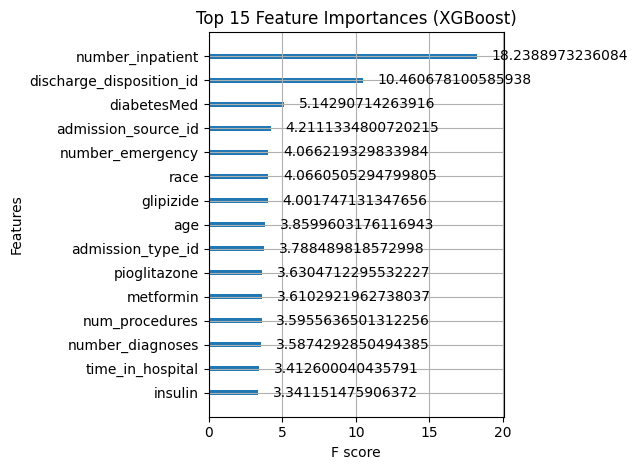

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
import xgboost as xgb

xgb.plot_importance(xgb_model.get_booster(), max_num_features=15, importance_type='gain')

plt.title("Top 15 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


In [81]:
# Sample selected features for clustering
clustering_features = [
    'age', 'gender', 'race', 'time_in_hospital', 'num_lab_procedures',
    'num_procedures', 'num_medications', 'number_inpatient', 'number_outpatient',
    'number_emergency', 'change', 'diabetesMed'
]

df_cluster = df[clustering_features].copy()



In [82]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
X_cluster = scaler.fit_transform(df_cluster)


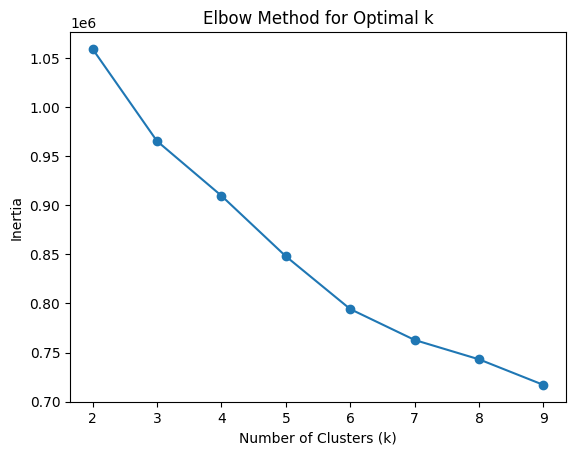

In [83]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find optimal k
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [87]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster)


In [89]:
# Summary statistics per cluster
cluster_summary = df.groupby('cluster')[clustering_features].mean()
# Or use display if you're in Jupyter
display(cluster_summary)



,age,gender,race,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_outpatient,number_emergency,change,diabetesMed
cluster,,,,,,,,,,,,
0,62.002133,0.447741,0.222174,3.757320,40.769149,1.269052,12.492341,0.437561,0.249758,0.097634,0.000000,0.000000
1,62.897242,0.463914,0.206551,7.912683,56.270978,2.719106,25.490849,0.535050,0.238962,0.113364,0.687633,0.953135
2,55.984577,0.482512,3.288901,3.903608,41.737538,1.166070,13.698155,0.492977,0.248141,0.163040,0.513082,0.821537
3,60.701889,0.468896,0.205778,3.245257,38.488433,0.866431,13.608021,0.423982,0.261643,0.114476,0.547853,1.000000
4,55.402341,0.423555,0.255304,4.555596,45.214338,0.907644,17.712326,3.902158,2.432151,1.730432,0.547366,0.858266


In [90]:
df.groupby('cluster')['readmitted'].value_counts(normalize=True)


cluster  readmitted
0        NO            0.606263
         >30           0.304247
         <30           0.089490
1        NO            0.520645
         >30           0.355385
         <30           0.123970
2        NO            0.602864
         >30           0.298540
         <30           0.098595
3        NO            0.541570
         >30           0.356157
         <30           0.102273
4        >30           0.514813
         <30           0.254206
         NO            0.230980
Name: proportion, dtype: float64